In [147]:
import pandas as pd
import numpy as np

In [148]:
df = pd.read_csv('/content/sample_data/retail_price.csv')
df.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [149]:
df.isna().sum()

,0
product_id,0
product_category_name,0
month_year,0
qty,0
total_price,0
freight_price,0
unit_price,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0


In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

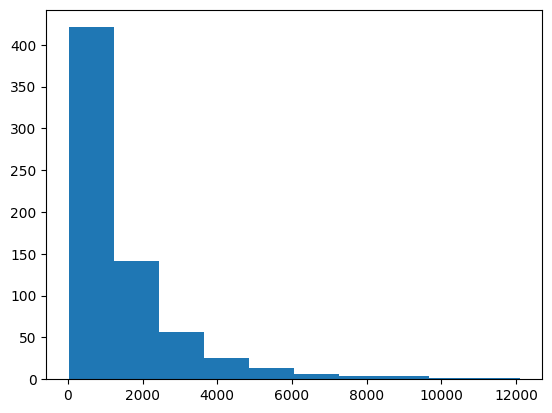

In [151]:
fig = plt.hist(df['total_price'])#,x='total_price',nbins=20)
plt.show()

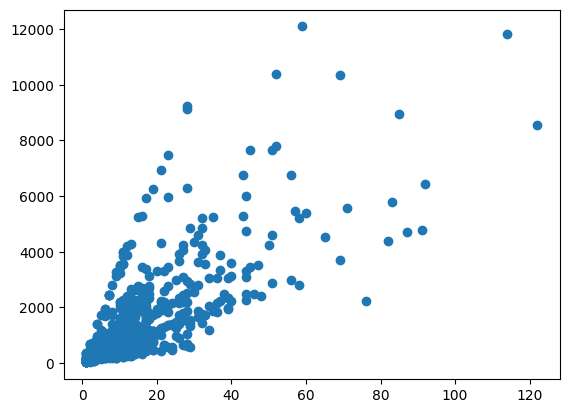

In [152]:
fig = plt.scatter(df['qty'],df['total_price'])
plt.show()

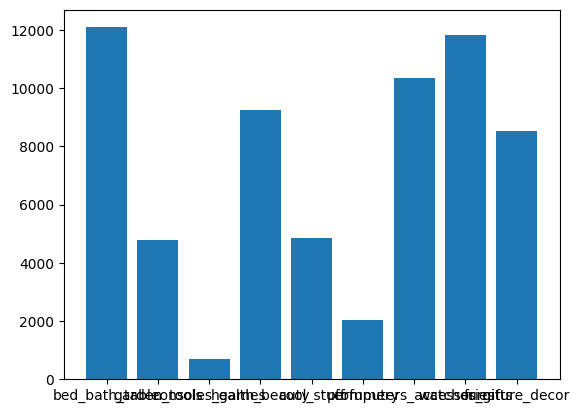

In [153]:
fig = plt.bar(df['product_category_name'],df['total_price'])
plt.show()

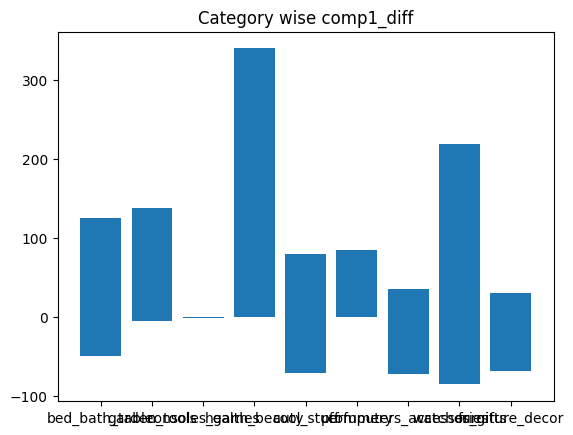

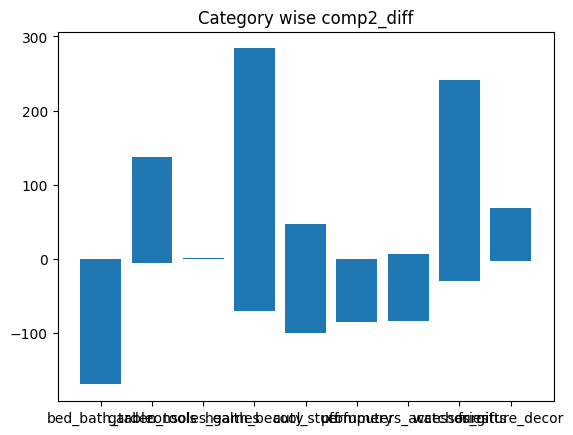

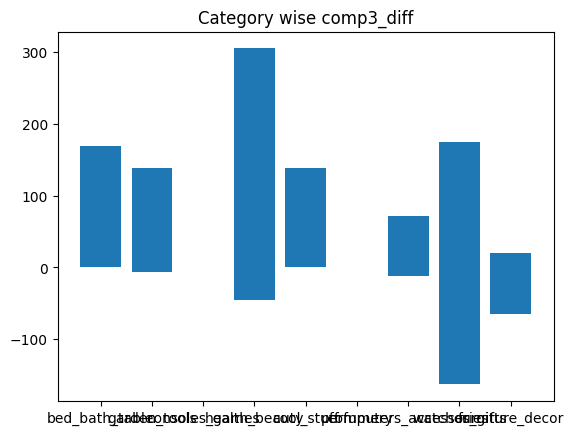

In [154]:
df['comp1_diff'] = df['unit_price'] - df['comp_1']
df['comp2_diff'] = df['unit_price'] - df['comp_2']
df['comp3_diff'] = df['unit_price'] - df['comp_3']

for i in range(1,4):
    comp = f"comp{i}_diff"
    plt.title("Category wise "+comp)
    fig = plt.bar(df['product_category_name'],df[comp])
    plt.show()

In [155]:
monthly_df = df.groupby(by='month_year').agg({
    'unit_price': 'mean', 'total_price': 'sum', 'freight_price': 'sum',
    'qty': 'sum', 'weekday': 'sum', 'weekend': 'sum', 'customers': 'sum'
}).reset_index()
monthly_df['month_year'] = pd.to_datetime(monthly_df['month_year'], format='%d-%m-%Y')
monthly_df = monthly_df.sort_values(by='month_year')
monthly_df.head()

,month_year,unit_price,total_price,freight_price,qty,weekday,weekend,customers
0,2017-01-01,207.445000,2864.19,33.961250,9,44,18,18
2,2017-02-01,127.827143,3584.11,217.847838,35,180,72,78
4,2017-03-01,122.586615,10204.38,282.314965,101,299,104,242
6,2017-04-01,119.288667,11524.62,335.440132,121,300,150,309
8,2017-05-01,104.785769,21843.33,393.828633,222,460,160,803


In [156]:
cols_to_mean = ['product_id', 'comp1_diff', 'comp2_diff', 'comp3_diff',
                'fp1_diff', 'fp2_diff', 'fp3_diff', 'product_score', 'unit_price']
cols_to_sum = ['product_id', 'total_price', 'freight_price', 'customers']
df = df.reindex(columns= set(cols_to_mean + cols_to_sum))
mean_df = df[cols_to_mean]
sum_df = df[cols_to_sum]
mean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     676 non-null    object 
 1   comp1_diff     676 non-null    float64
 2   comp2_diff     676 non-null    float64
 3   comp3_diff     676 non-null    float64
 4   fp1_diff       0 non-null      float64
 5   fp2_diff       0 non-null      float64
 6   fp3_diff       0 non-null      float64
 7   product_score  676 non-null    float64
 8   unit_price     676 non-null    float64
dtypes: float64(8), object(1)
memory usage: 47.7+ KB


In [157]:
products_mean = mean_df.groupby(by='product_id').mean()
products_sum = sum_df.groupby(by='product_id').sum()
print(products_mean, products_sum)

            comp1_diff  comp2_diff  comp3_diff  fp1_diff  fp2_diff  fp3_diff  \
product_id                                                                     
bed1        -43.976523  -47.634907    0.000000       NaN       NaN       NaN   
bed2          0.000000  -28.547817   37.032861       NaN       NaN       NaN   
bed3          7.599892    0.000000   51.588471       NaN       NaN       NaN   
bed4        -38.826174    0.000000    6.085263       NaN       NaN       NaN   
bed5        108.481703    0.000000  152.431703       NaN       NaN       NaN   
computers1  -45.137758  -31.581488   -1.247542       NaN       NaN       NaN   
computers2  -46.368308  -54.710919    0.000000       NaN       NaN       NaN   
computers3  -10.118902   -3.428455   14.261522       NaN       NaN       NaN   
computers4    0.000000   -9.089228   25.760171       NaN       NaN       NaN   
computers5  -37.474303  -48.100581    3.775567       NaN       NaN       NaN   
computers6   20.450763    0.000000   68.

In [158]:
products = pd.concat([products_sum, products_mean],
                     axis=1, join='inner').reset_index()
products

,product_id,total_price,freight_price,customers,comp1_diff,comp2_diff,comp3_diff,fp1_diff,fp2_diff,fp3_diff,product_score,unit_price
0,bed1,5831.77,240.410762,915,-43.976523,-47.634907,0.000000,NaN,NaN,NaN,4.0,42.211989
1,bed2,42938.66,324.204152,968,0.000000,-28.547817,37.032861,NaN,NaN,NaN,3.9,86.774536
2,bed3,10304.96,172.316049,530,7.599892,0.000000,51.588471,NaN,NaN,NaN,3.3,92.101364
3,bed4,6011.77,151.576305,515,-38.826174,0.000000,6.085263,NaN,NaN,NaN,4.2,46.725444
4,bed5,29997.36,96.015504,385,108.481703,0.000000,152.431703,NaN,NaN,NaN,4.4,198.381703
5,computers1,12306.81,225.560978,890,-45.137758,-31.581488,-1.247542,NaN,NaN,NaN,4.0,92.482149
6,computers2,15439.25,166.341540,864,-46.368308,-54.710919,0.000000,NaN,NaN,NaN,3.5,87.234536
7,computers3,15111.82,280.774649,529,-10.118902,-3.428455,14.261522,NaN,NaN,NaN,4.2,143.472964
8,computers4,46916.51,731.001186,968,0.000000,-9.089228,25.760171,NaN,NaN,NaN,4.2,141.576034
9,computers5,11240.96,115.774567,763,-37.474303,-48.100581,3.775567,NaN,NaN,NaN,3.5,100.243737


In [159]:
X, y = products.drop(['product_id', 'unit_price'], axis=1), products['unit_price']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   total_price    52 non-null     float64
 1   freight_price  52 non-null     float64
 2   customers      52 non-null     int64  
 3   comp1_diff     52 non-null     float64
 4   comp2_diff     52 non-null     float64
 5   comp3_diff     52 non-null     float64
 6   fp1_diff       0 non-null      float64
 7   fp2_diff       0 non-null      float64
 8   fp3_diff       0 non-null      float64
 9   product_score  52 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 4.2 KB


In [160]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.head()

,total_price,freight_price,customers,comp1_diff,comp2_diff,comp3_diff,fp1_diff,fp2_diff,fp3_diff,product_score
37,54730.20,542.795465,1775,295.392948,224.438747,290.250509,NaN,NaN,NaN,4.3
24,7333.70,453.435215,1832,-0.353172,-0.482322,-0.439260,NaN,NaN,NaN,4.3
44,31786.82,313.445599,1352,30.566106,32.474377,0.000000,NaN,NaN,NaN,3.8
33,7757.91,83.146419,943,22.306946,-31.817291,-8.448516,NaN,NaN,NaN,4.2
49,37683.42,189.435326,1284,0.000000,9.417492,-37.115986,NaN,NaN,NaN,4.2


In [161]:
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

# **Random Forest**

In [162]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

In [163]:
model = RandomForestRegressor(n_estimators=30, random_state=20)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
X.head()

,total_price,freight_price,customers,comp1_diff,comp2_diff,comp3_diff,fp1_diff,fp2_diff,fp3_diff,product_score
0,5831.77,240.410762,915,-43.976523,-47.634907,0.000000,NaN,NaN,NaN,4.0
1,42938.66,324.204152,968,0.000000,-28.547817,37.032861,NaN,NaN,NaN,3.9
2,10304.96,172.316049,530,7.599892,0.000000,51.588471,NaN,NaN,NaN,3.3
3,6011.77,151.576305,515,-38.826174,0.000000,6.085263,NaN,NaN,NaN,4.2
4,29997.36,96.015504,385,108.481703,0.000000,152.431703,NaN,NaN,NaN,4.4


In [164]:
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"R2 score: {r2_score(y_test, y_pred)}")

Mean Absolute Error: 31.425957289182175
R2 score: 0.7699760724872389


# **Decesion Tree**

In [165]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree

In [166]:
model = DecisionTreeRegressor(criterion='squared_error', max_depth=5)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [167]:
y_pred = model.predict(X_test)
mse = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mse:.2f}")
print(f"R2 score: {r2:.2f}")

Mean Absolute Error: 27.29
R2 score: 0.74


In [168]:
tp= 4000
fp= 20
c= 30045
cp1=89
cp2=34
cp3=0
fp1=28
fp2=65
fp3=45
ps=3.7
model.predict(pd.DataFrame([[tp,fp,c,cp1,cp2,cp3,fp1,fp2,fp3,ps]], columns=X.columns))

array([29.9])